# 📉📊📈Stock Price Prediction with Machine Learning Models📉📊📈

Because of its complexity and difficulty, forecasting stock prices fascinates researchers and industry specialists from a variety of fields, including computer science, economics, business arithmetic, and marketing. Despite considerable attempts over the last decade, stock market price forecasting remains difficult due to the intrinsic random wandering nature of market prices. Stock price volatility creates significant challenges for precise forecasting. Nonetheless, establishing efficient and accurate forecasting models is critical for managers, investors, and decision-makers to make sound investment decisions. Analysts use machine learning techniques to evaluate historical data and uncover patterns and trends that might assist forecast future stock performance. Researchers try to create prediction models that can efficiently manage the unpredictable nature of stock markets by combining current and historical data.

<br/>

## 📈 Decision Tree Model 📉

### Import libraries

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 

# MATPLOTLIB FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [3]:
DATASET_FILE_PATH = './yahoo_data.csv'

In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv(DATASET_FILE_PATH)

# Display the first few rows of the DataFrame and format the date column
df.head().style.format({'Date': lambda x: pd.to_datetime(x).strftime('%Y-%m-%d')})

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-28,"33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000"
1,2023-04-27,"33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000"
2,2023-04-26,"33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000"
3,2023-04-25,"33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000"
4,2023-04-24,"33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000"


### Data Preprocessing

In [7]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Remove commas and convert columns to numeric type
df['Open'] = df['Open'].replace(',', '', regex=True).astype(float)
df['High'] = df['High'].replace(',', '', regex=True).astype(float)
df['Low'] = df['Low'].replace(',', '', regex=True).astype(float)
df['Close'] = df['Close'].replace(',', '', regex=True).astype(float)
df['Adj Close'] = df['Adj Close'].replace(',', '', regex=True).astype(float)
df['Volume'] = df['Volume'].replace(',', '', regex=True).astype(int)

In [36]:
df['Increase_Decrease'] = np.where(df['Volume'].shift(-1) > df['Volume'], 1, 0)
df['Buy_Sell_on_Open'] = np.where(df['Open'].shift(-1) > df['Open'], 1, -1)
df['Buy_Sell'] = np.where(df['Adj Close'].shift(-1) > df['Adj Close'], 1, -1)
df['Return'] = df['Adj Close'].pct_change()

### Display preprocessed dataset

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,0,1,-1,-0.007977
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,0,1,1,-0.015500
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,0,-1,1,0.006875
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,1,-1,-1,0.010276
5,2023-04-21,33793.60,33858.83,33688.57,33808.96,33808.96,291080000,1,-1,-1,-0.001961
...,...,...,...,...,...,...,...,...,...,...,...
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,1,-1,-1,-0.000119
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,1,-1,-1,-0.003892
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,0,1,-1,-0.013699
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,0,1,1,-0.000216


### Dataset cleaning and Null value testing

In [37]:
df = df.dropna()
df.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Return               0
dtype: int64

<br/>

### Analyze the dataset

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Return'],
      dtype='object')

In [39]:
df.shape

(1256, 11)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'Increase_Decrease'}>,
        <Axes: title={'center': 'Buy_Sell_on_Open'}>,
        <Axes: title={'center': 'Buy_Sell'}>],
       [<Axes: title={'center': 'Return'}>, <Axes: >, <Axes: >]],
      dtype=object)

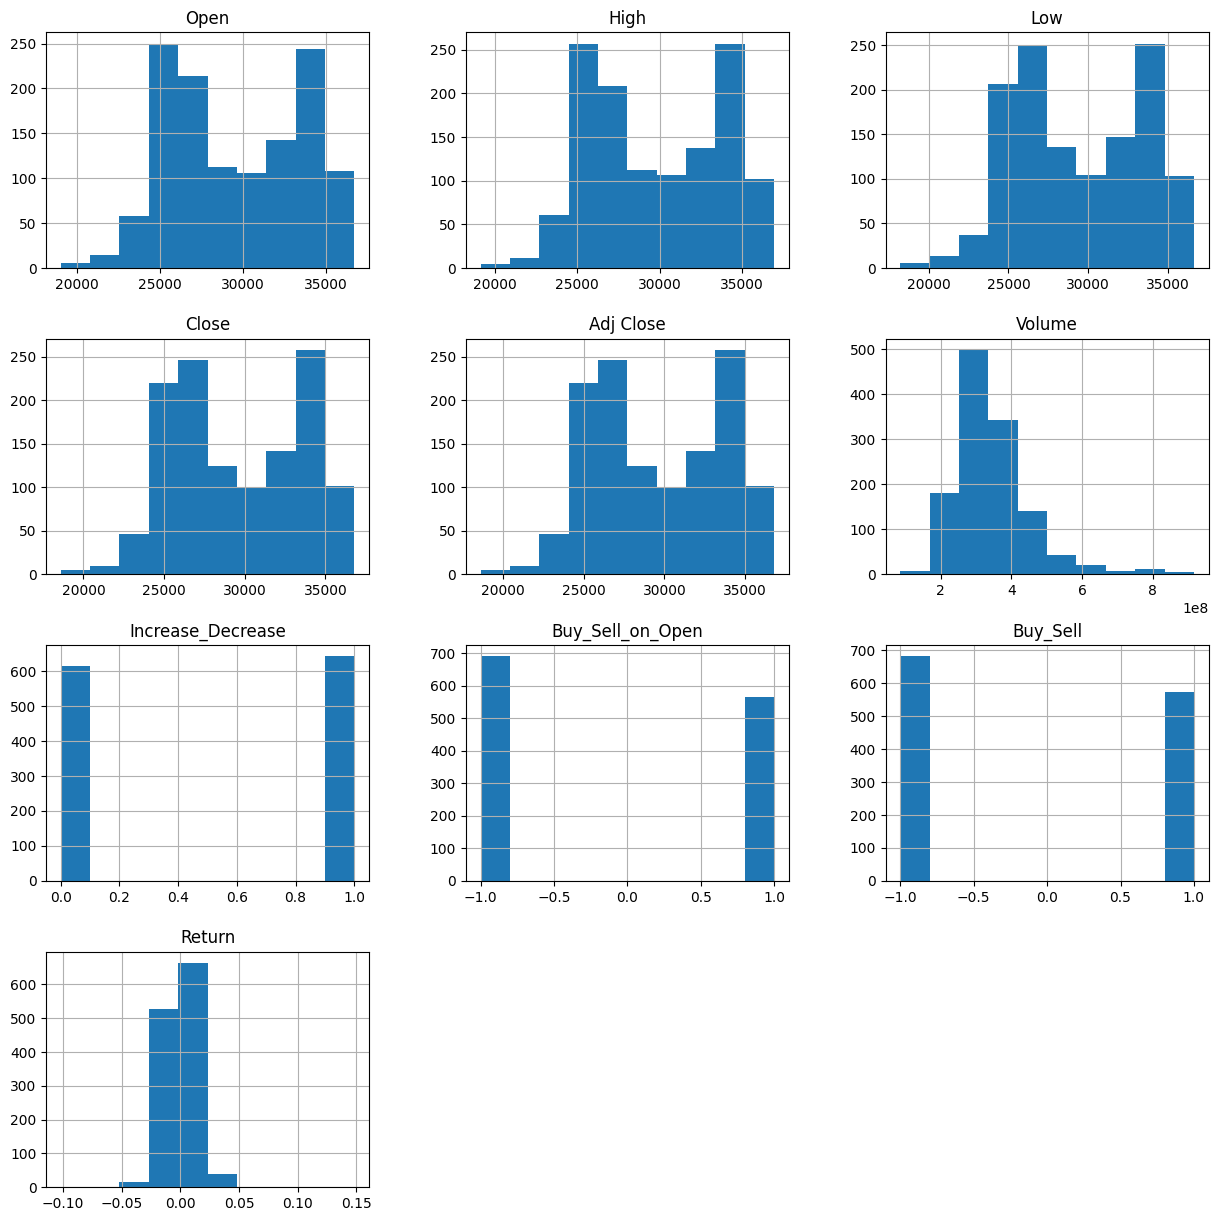

In [41]:
# Histogram per each numerical column
sort_columns = df.iloc[:, 1:]
sort_columns.hist(figsize=(15, 15))
# plt.savefig('histogram.png')

In [14]:
# The statistics per each column
sort_columns.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000
mean,29592.480477,29773.502928,29398.990724,29595.782681,29595.782681,3.450563e+08,0.510740,-0.097852,-0.086714,-0.000184
std,4005.917425,4008.742338,4004.681746,4007.052034,4007.052034,1.069564e+08,0.500084,0.995597,0.996630,0.013664
min,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07,0.000000,-1.000000,-1.000000,-0.102052
25%,26040.300000,26162.280000,25877.240000,26026.320000,26026.320000,2.772300e+08,0.000000,-1.000000,-1.000000,-0.006289
50%,29198.920000,29330.160000,28995.660000,29196.040000,29196.040000,3.245800e+08,1.000000,-1.000000,-1.000000,-0.000725
75%,33596.340000,33817.960000,33343.430000,33597.920000,33597.920000,3.876100e+08,1.000000,1.000000,1.000000,0.004709
max,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08,1.000000,1.000000,1.000000,0.148456


<br/>

### Define inputs (X) & targets(Y)

In [15]:
X = df.drop(['Date', 'Adj Close', 'Close'], axis=1)  
y = df['Adj Close'] 

<br/>

### Split dataset into train set & validation set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<br/>

### Model traning

In [32]:
model = DecisionTreeRegressor(random_state=0)  
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

<br/>

### Comparison of Actual Values and Predictions Values

In [21]:
y_pred = model.predict(X_test)

In [23]:
adj_value = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(adj_value.head(), "\n")
print(adj_value.tail())

       Actual  Predicted
6    33786.62   33745.40
495  34269.16   34496.51
53   33869.27   33826.69
985  24815.04   25014.86
187  32798.40   32953.46 

        Actual  Predicted
1103  24423.26   24133.78
32    32155.40   32246.55
409   34869.63   34921.88
65    33743.84   33733.96
1030  25625.59   25473.23


In [24]:
print(y_test.shape)
print(y_pred.shape)

(252,)
(252,)


<br/>

### Accuracy and Loss function values of the model

In [25]:
from sklearn import metrics  
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 139.08472222222218
Mean_Squared_Error(MSE): 49705.407550396805
Root_Mean_Squared_Error(RMSE): 222.94709585548947


In [27]:
from sklearn.model_selection import cross_val_score

dt_fit = model.fit(X_train, y_train)
dt_scores = cross_val_score(dt_fit, X_train, y_train, cv = 5)

In [42]:
print("Accuracy score: {:.7f}".format(model.score(X_test, y_test)))

Accuracy score: 0.9970342


<br/>

### Plot the Actual and Predicted stock prices

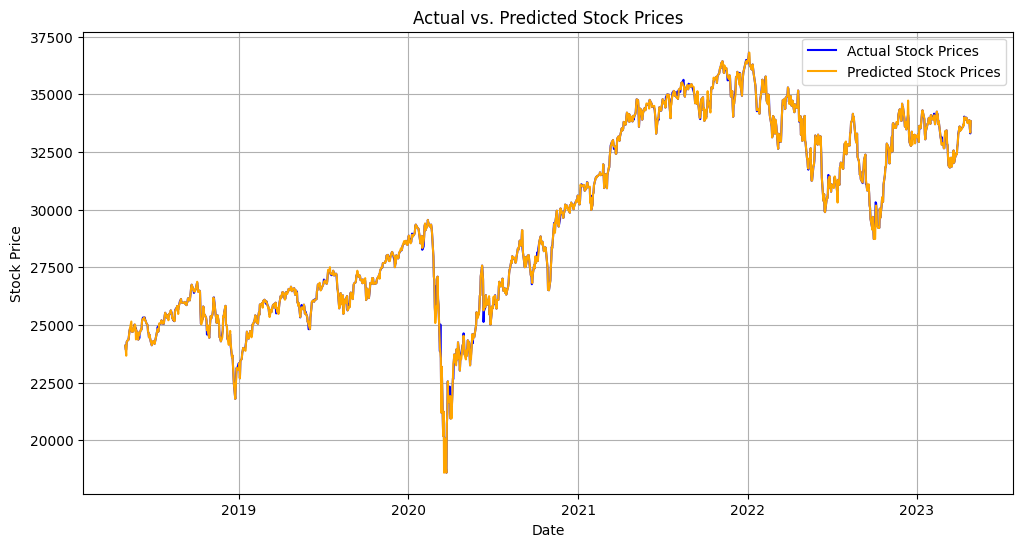

In [35]:
# Plotting the actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Actual Stock Prices', color='blue')

# Plotting the predicted stock prices for the entire dataset
plt.plot(df['Date'], model.predict(X), label='Predicted Stock Prices', color='orange')

plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()